### **PREDICTION OF LUNG CANCER USING HISTOPATHOGICAL IMAGES**

###1. Importing necessary libraries


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import os
import cv2
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

###2. Loading data and their labels

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [ ]:
#path='/content/Drive/MyDrive/lung_image_sets'
path='/content/Drive/MyDrive/Data Set/lung_image_sets'
classes=os.listdir(path)

In [ ]:
classes

['lung_aca', 'lung_n', 'lung_scc']

In [ ]:
images=[]
labels=[]

In [ ]:
#image_path1=os.path.join(path,classes[0])
#image_path2=os.path.join(path,classes[1])
#image_path3=os.path.join(path,classes[2])

#### Loading and resizing the data

In [ ]:
for f in range(len(classes)):
  image_path=os.path.join(path,classes[f])
  for i in os.listdir(image_path):
    img=cv2.imread(os.path.join(image_path,i))
    if img is not None:
      images.append(cv2.resize(img,(224,224)))
      labels.append(classes[f])

In [ ]:
#count=0
#for f in os.listdir(image_path3):
#  img = cv2.imread(os.path.join(image_path3,f))
#  if img is not None:
#    count +=1
#    if count <= 1500:
#      images.append(img)
#      labels.append(classes[2])
#    else:
#      break

array([[[182,  37,  84],
        [178,  36,  79],
        [180,  42,  84],
        ...,
        [220, 122, 154],
        [229, 126, 160],
        [234, 126, 159]],

       [[191,  49,  97],
        [188,  50,  95],
        [194,  56, 100],
        ...,
        [227, 149, 174],
        [241, 160, 185],
        [241, 156, 179]],

       [[199,  73, 118],
        [198,  72, 113],
        [205,  80, 120],
        ...,
        [232, 173, 188],
        [233, 174, 188],
        [233, 172, 182]],

       ...,

       [[206,  96, 144],
        [211, 102, 148],
        [212, 104, 147],
        ...,
        [217,  95, 136],
        [235, 132, 168],
        [234, 155, 179]],

       [[208,  98, 146],
        [213, 104, 150],
        [208, 100, 142],
        ...,
        [222, 103, 141],
        [247, 144, 176],
        [242, 166, 186]],

       [[207,  97, 145],
        [211, 102, 148],
        [206,  98, 141],
        ...,
        [229, 112, 146],
        [254, 151, 181],
        [243, 168, 185]]], dtype=uint8)
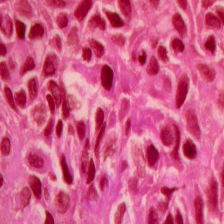

In [ ]:
images[10250]

####3.Converting in to arrays

In [ ]:
x=[]
#for i in range(0,len(images)):
# x.append(cv2.resize(images[i],(224,224)))

In [ ]:
for i in range(0,len(images)):
  #x.append(cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY))
  x.append(images[i])


In [ ]:
x=np.asarray(x)

In [ ]:
x.shape

(15000, 224, 224, 3)

###4. Processing labels

In [ ]:
labels1=pd.Series(labels)
labels1

0        lung_aca
1        lung_aca
2        lung_aca
3        lung_aca
4        lung_aca
           ...   
14995    lung_scc
14996    lung_scc
14997    lung_scc
14998    lung_scc
14999    lung_scc
Length: 15000, dtype: object

In [ ]:
np.unique(labels,return_counts=True)

(array(['lung_aca', 'lung_n', 'lung_scc'], dtype='<U8'),
 array([5000, 5000, 5000]))

In [ ]:
#labels.unique()

In [ ]:
labels1.replace('lung_scc',1,inplace=True)
labels1.replace('lung_aca',2,inplace=True)
labels1.replace('lung_n',0,inplace=True)

In [ ]:
labels1.unique()

array([2, 0, 1])

###5. One hot encoding of labels

In [ ]:
from keras.utils import to_categorical
y = to_categorical(labels1, dtype ="uint8")

In [ ]:
#y=pd.get_dummies(labels).values
y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

###6. Split data in to train and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13,stratify=y)

In [ ]:
x_train.shape,y_train.shape

((12000, 224, 224, 3), (12000, 3))

In [ ]:
x_test.shape,y_test.shape

((3000, 224, 224, 3), (3000, 3))

In [ ]:
y_train

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

###7. Model Architecture(Mobilenet)

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense

In [ ]:
mobilenet = MobileNet(weights='imagenet', include_top=False,
                      input_shape=(224,224,3), classes=y_train.shape[1])

model_mn = Sequential()

# Add the mobilenet convolutional base model
model_mn.add(mobilenet)

# Add new layers
model_mn.add(Flatten())
model_mn.add(Dense(128, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dense(64, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dropout(0.3))
model_mn.add(Dense(16, activation='relu'))
model_mn.add(BatchNormalization())
model_mn.add(Dropout(0.3))

# Output layer
model_mn.add(Dense(3, activation='softmax'))
model_mn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                2

###8. Model Compile

In [ ]:
model_mn.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model_2=model_mn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,verbose=1)

Epoch 1/30
375/375 [==============================] - 69s 123ms/step - loss: 0.3122 - accuracy: 0.9003 - val_loss: 0.0909 - val_accuracy: 0.9793
Epoch 2/30
375/375 [==============================] - 46s 123ms/step - loss: 0.1476 - accuracy: 0.9670 - val_loss: 0.0322 - val_accuracy: 0.9963
Epoch 3/30
375/375 [==============================] - 46s 123ms/step - loss: 0.0969 - accuracy: 0.9818 - val_loss: 0.0257 - val_accuracy: 0.9953
Epoch 4/30
375/375 [==============================] - 46s 123ms/step - loss: 0.0700 - accuracy: 0.9880 - val_loss: 0.0162 - val_accuracy: 0.9973
Epoch 5/30
375/375 [==============================] - 44s 118ms/step - loss: 0.0554 - accuracy: 0.9910 - val_loss: 0.0119 - val_accuracy: 0.9983
Epoch 6/30
375/375 [==============================] - 46s 123ms/step - loss: 0.0494 - accuracy: 0.9922 - val_loss: 0.0129 - val_accuracy: 0.9967
Epoch 7/30
375/375 [==============================] - 46s 123ms/step - loss: 0.0479 - accuracy: 0.9904 - val_loss: 0.0071 - val_ac

### Building Confusion matrix

In [ ]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target.argmax(axis=1), y_pred.argmax(axis=1))
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3,3)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    classification_report,
    ConfusionMatrixDisplay
)

94/94 [==============================] - 4s 32ms/step


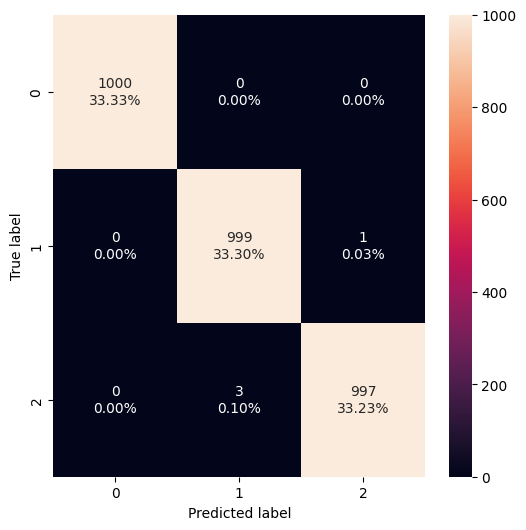

In [ ]:
confusion_matrix_statsmodels(
    model_mn, x_test, y_test, threshold=0.5)

###Accuracy and loss curve

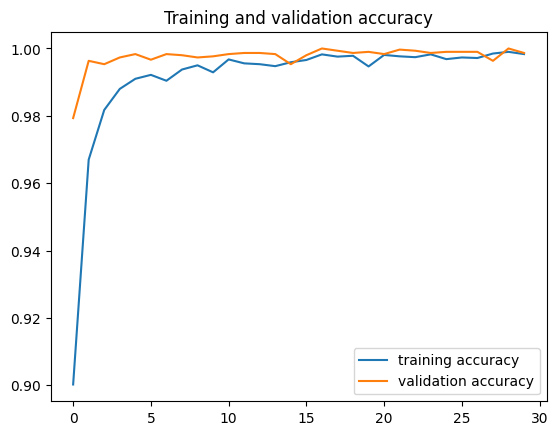

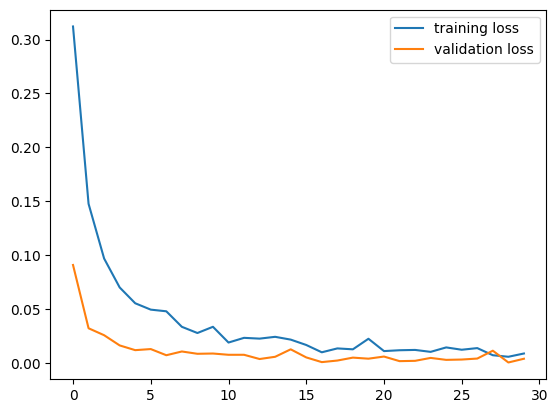

In [ ]:
accuracy = model_2.history['accuracy']
val_accuracy = model_2.history['val_accuracy']
loss = model_2.history['loss']
val_loss = model_2.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')

In [ ]:
model_mn.save('model_mn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
